In [557]:
import pandas as pd
import string
import re
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Stress Analysis in Social Media - RUCHI BHATHIA
https://www.kaggle.com/datasets/ruchi798/stress-analysis-in-social-media

dreaddit-test.csv
dreaddit-train.csv

In [558]:
stress_directory = "../data/external/stress"

In [559]:
dataset_1 = pd.read_csv(f"{stress_directory}/dreaddit-test.csv")
dataset_1.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [560]:
dataset_2 = pd.read_csv(f"{stress_directory}/dreaddit-train.csv")
dataset_2.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [561]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


## Stress Detection from Social Media Articles
https://www.kaggle.com/datasets/mexwell/stress-detection-from-social-media-articles

Reddit_Combi.csv
Reddit_Title.csv
Twitter_Non-Advert-Tabelle.csv
Twiiter_Full.csv

In [562]:
dataset_3 = pd.read_csv(f"{stress_directory}/Reddit_Combi.csv", delimiter=';')
dataset_3

,title,body,Body_Title,label,Unnamed: 4
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",Envy to other is swallowing me Im from develop...,1,NaN
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,Nothin outta the ordinary. Paradise. Job stres...,1,NaN
2,Almost 49 and the chasm of emptiness has never...,I’ve been diagnosed severe bi polar where you ...,Almost 49 and the chasm of emptiness has never...,1,NaN
3,I’m happy again,"After my closest friend left me in April, I ha...",I’m happy again After my closest friend left m...,0,NaN
4,Is it possible to recover from such a traumati...,"I am only 15, and yet I feel my life is alread...",Is it possible to recover from such a traumati...,1,NaN
...,...,...,...,...,...
3118,Positive relief ideas with stress?,"Hi all, my mom has been working from home sinc...","Positive relief ideas with stress? Hi all, my ...",1,NaN
3119,Breakdown,"I really think I lost my mind last night, I’d ...",Breakdown I really think I lost my mind last n...,1,NaN
3120,I feel as if I actually died a long time ago a...,I feel like I died a long time ago and I just ...,I feel as if I actually died a long time ago a...,1,NaN
3121,Is it wierd that i have imaginary friends at t...,16f ... cant manage to make friends and get ov...,Is it wierd that i have imaginary friends at t...,1,NaN


In [563]:
dataset_4 = pd.read_csv(f"{stress_directory}/Twitter_NA.csv", delimiter=';')
dataset_4

,text,label,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,speak-no-evil monkey Can I Be Honest With You...,1,NaN,NaN,NaN
1,Frau Goebbels early signs of psychosis psychot...,1,NaN,NaN,NaN
2,A lot of work and unfulfilled tasks plunge you...,1,NaN,NaN,NaN
3,Private health insurance delivers value for yo...,1,NaN,NaN,NaN
4,XpertOnline offers you the convenience of view...,1,NaN,NaN,NaN
...,...,...,...,...,...
2046,Adaptogens like echinacea and turmeric help pr...,1,NaN,NaN,NaN
2047,Stanford Study Being Kind to Others Improves B...,1,NaN,NaN,NaN
2048,Thank you for all your business questions toda...,0,NaN,NaN,NaN
2049,no mobile phones Three Tips to Reduce Technos...,1,NaN,NaN,NaN


In [564]:
dataset_5 = pd.read_csv(f"{stress_directory}/Twitter_Full.csv", delimiter=';')
dataset_5

,text,hashtags,labels,Unnamed: 3,Unnamed: 4
0,Being s mom is cleaning 24/7 the same shit ove...,"['momlife', 'kids', 'tired']",1,NaN,NaN
1,And now we have been given the walkthru book b...,['walkthru'],0,NaN,NaN
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,"['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHe...",0,NaN,NaN
3,speak-no-evil monkey Can I Be Honest With You...,"['therapy', 'help', 'NLP', 'CBT', 'hypnotherap...",1,NaN,NaN
4,Psy Do u hv any regrets? Me No Psy Are you hap...,[],0,NaN,NaN
...,...,...,...,...,...
8895,Thank you for all your business questions toda...,"['business', 'business', 'Stress', 'mind', 'bo...",0,NaN,NaN
8896,Who is planning on walking their minds today?!...,"[""'walkthemind'"", ""'walking'"", ""'walk'"", ""'hik...",1,NaN,NaN
8897,no mobile phones Three Tips to Reduce Technos...,"['m1hl', 'stress', 'technostress', 'tips']",1,NaN,NaN
8898,purple heart Day 1 purple heart But vets firs...,"['DogsofTwittter', 'shout', 'getoutforshout', ...",1,NaN,NaN


## Dataset for Stress Analysis in Social Media
https://www.kaggle.com/datasets/monishakant/dataset-for-stress-analysis-in-social-media

dreaddit_StressAnalysis.csv

In [565]:
dataset_6 = pd.read_csv(f"{stress_directory}/dreaddit_StressAnalysis.csv")
dataset_6

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.800000,1514980773,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.000000,1493348050,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.000000,1524516630,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.500000,1524018289,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.800000,1516200171,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,24271,ptsd,7vavh4,"(0, 5)",i have horrible vivid nightmares every night. ...,1,1.000000,1517790160,7,4.597368,...,1.0000,1.2000,1.0,1.76956,1.46522,1.84112,0.79,15,4.589333,-0.075000
711,2212,relationships,7oeyuc,"[70, 75]",Also I can't think about both of them without ...,1,0.571429,1515192055,0,1.452083,...,1.0000,1.1818,1.0,1.67960,1.51429,1.83530,0.50,7,2.833889,0.189286
712,27951,relationships,7ssxec,"(35, 40)","Furthermore, I told him before we got really s...",1,0.600000,1516848555,3,3.956447,...,1.0000,1.0000,1.0,1.71367,1.50909,1.85501,0.72,10,5.709053,-0.044444
713,1164,assistance,90bila,"[8, 13]",Here's the link to my amazon wish list where t...,0,0.600000,1532048310,18,0.236814,...,1.5000,1.0000,1.0,1.65132,1.53913,1.90766,0.74,2,2.365294,0.090000


## Stress Analysis
https://www.kaggle.com/datasets/shuvojitdas/stress-analysis

stress.csv

In [566]:
dataset_7 = pd.read_csv(f"{stress_directory}/stress.csv")
dataset_7

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


## Reddit Mental Health Dataset (RMHD)
### Mental Health Data Spanning Covid Era- Jan 2019-Aug 2022-Pre-Mid and Post Covid
https://www.kaggle.com/datasets/entenam/reddit-mental-health-dataset

647 MB

## Combining Datasets


### Take the text and label columns

In [567]:
df1 = dataset_1[['text', 'label']]
df1.head()

,text,label
0,"Its like that, if you want or not.“ ME: I have...",0
1,I man the front desk and my title is HR Custom...,0
2,We'd be saving so much money with this new hou...,1
3,"My ex used to shoot back with ""Do you want me ...",1
4,I haven’t said anything to him yet because I’m...,0


In [568]:
df2 = dataset_2[['text', 'label']]
df2.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [569]:
df3 = dataset_3[['Body_Title', 'label']].rename(columns={'Body_Title': 'text', 'labels': 'label'})
df3.head()

,text,label
0,Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,1


In [570]:
df4 = dataset_4[['text', 'label']]
df4.head()

,text,label
0,speak-no-evil monkey Can I Be Honest With You...,1
1,Frau Goebbels early signs of psychosis psychot...,1
2,A lot of work and unfulfilled tasks plunge you...,1
3,Private health insurance delivers value for yo...,1
4,XpertOnline offers you the convenience of view...,1


In [571]:
df5 = dataset_5[['text', 'labels']].rename(columns={'labels': 'label'})
df5.head()

,text,label
0,Being s mom is cleaning 24/7 the same shit ove...,1
1,And now we have been given the walkthru book b...,0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0
3,speak-no-evil monkey Can I Be Honest With You...,1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0


In [572]:
df6 = dataset_6[['text', 'label']]
df6.head()

,text,label
0,"Its like that, if you want or not.“ ME: I have...",0
1,I man the front desk and my title is HR Custom...,0
2,We'd be saving so much money with this new hou...,1
3,"My ex used to shoot back with ""Do you want me ...",1
4,I haven’t said anything to him yet because I’m...,0


In [573]:
df7 = dataset_7[['text', 'label']]
df7.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [574]:
# Concatenating DataFrames along rows
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0, ignore_index=True)
df

,text,label
0,"Its like that, if you want or not.“ ME: I have...",0
1,I man the front desk and my title is HR Custom...,0
2,We'd be saving so much money with this new hou...,1
3,"My ex used to shoot back with ""Do you want me ...",1
4,I haven’t said anything to him yet because I’m...,0
...,...,...
21175,"* Her, a week ago: Precious, how are you? (I i...",0
21176,I don't have the ability to cope with it anymo...,1
21177,In case this is the first time you're reading ...,0
21178,Do you find this normal? They have a good rela...,0


### Check for missing values and duplicates
Before duplicates:
After: 15103 rows

In [575]:
# Drop all duplicates
df = df.drop_duplicates(subset=['text', 'label'])
print("\nDataFrame without duplicates:")
df


DataFrame without duplicates:


,text,label
0,"Its like that, if you want or not.“ ME: I have...",0
1,I man the front desk and my title is HR Custom...,0
2,We'd be saving so much money with this new hou...,1
3,"My ex used to shoot back with ""Do you want me ...",1
4,I haven’t said anything to him yet because I’m...,0
...,...,...
17626,This is exactly what Bella did to me last nigh...,1
17989,I know about the whole insecurity thing. Ive d...,0
18015,"After doing this twice, she sent me a message ...",0
18058,The title pretty much says it all but I want t...,0


In [576]:
df.isna().sum()

text     2
label    0
dtype: int64

In [577]:
df = df.dropna()
df

,text,label
0,"Its like that, if you want or not.“ ME: I have...",0
1,I man the front desk and my title is HR Custom...,0
2,We'd be saving so much money with this new hou...,1
3,"My ex used to shoot back with ""Do you want me ...",1
4,I haven’t said anything to him yet because I’m...,0
...,...,...
17626,This is exactly what Bella did to me last nigh...,1
17989,I know about the whole insecurity thing. Ive d...,0
18015,"After doing this twice, she sent me a message ...",0
18058,The title pretty much says it all but I want t...,0


Convert to CSV

In [578]:
df.to_csv("../data/processed/stress/combined_df")

## Data Visualization

In [579]:
def get_word_amount_in_sentence(text: str) -> int:
    return len(text.split(" "))

In [580]:
# add the new columns with amount of words
df['words_amount'] = df['text'].apply(lambda x: get_word_amount_in_sentence(x))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8148\1366711945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words_amount'] = df['text'].apply(lambda x: get_word_amount_in_sentence(x))


## Data Exploration

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15101 entries, 0 to 18155
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          15101 non-null  object
 1   label         15101 non-null  int64 
 2   words_amount  15101 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 471.9+ KB


In [582]:
df.isna().sum()

text            0
label           0
words_amount    0
dtype: int64

### Check distrubution of word amounts

<Axes: >

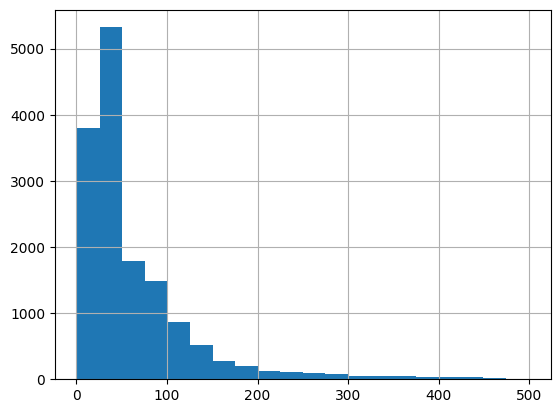

In [583]:
df[df['words_amount']<500]['words_amount'].hist(bins=20)

## Text Processing

In [584]:
# Define a function to remove stop words from a sentence
def remove_stop_words(tokens):
    # Get nltk English stop words
    stop_words = set(stopwords.words('english'))

    # Use a list comprehension to remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]

    return filtered_tokens

In [585]:
def remove_punc(tokens: list[str]) -> list[str]:
    filtered_tokens = [re.sub(r'[^a-zA-Z ]','', text) for text in tokens]

    return filtered_tokens

In [586]:
def perform_lemmatization(tokens: list[str]) -> list[str]:
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token, pos="v") for token in tokens] # lemmatize verb
    tokens = [lemmatizer.lemmatize(token, pos="a") for token in tokens] # lemmatize adjective
    tokens = [lemmatizer.lemmatize(token, pos="n") for token in tokens] # lemmatize noun
    tokens = [lemmatizer.lemmatize(token, pos="s") for token in tokens] # lemmatize

    return tokens

In [587]:
from spellchecker import SpellChecker

spell_corrector = SpellChecker()

# spelling correction using spellchecker
def spell_correction(text):
	"""
	Return :- text which have correct spelling words
	Input :- string
	Output :- string
	"""
	# initialize empty list to save correct spell words
	correct_words = []
	# extract spelling incorrect words by using unknown function of spellchecker
	misSpelled_words = spell_corrector.unknown(text.split())

	for each_word in text.split():
		if each_word in misSpelled_words:
			right_word = spell_corrector.correction(each_word)
			correct_words.append(right_word)
		else:
			correct_words.append(each_word)

	# joining correct_words list into single string
	correct_spelling = ' '.join(correct_words)
	return correct_spelling

In [588]:
def clean_text(text: str) -> str:
    text = text.lower()

    tokens = text.split(" ")

    lemmatized_tokens = perform_lemmatization(tokens)

    filtered_tokens = remove_stop_words(lemmatized_tokens)

    clean_tokens = [word for word in remove_punc(filtered_tokens) if len(word) > 0]

    # correct_tokens = [spell_corrector.correction(word) for word in clean_tokens if type(word) != 'NoneType']

    # Remove short words
    remove_short_tokens = [word for word in clean_tokens if len(word) > 2]

    return " ".join(remove_short_tokens)

clean_text(df['text'][14])

'thing ever want arms basically terrify back arm every fuck time well say love you hell hold tight hes warm crave soo bad arm tbh wanna sleep know bed'

In [589]:
df['clean_text'] = df['text'].apply(lambda x: clean_text(x))
df['clean_text'].head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8148\4176662531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(lambda x: clean_text(x))


0    like that want not problem take longer ask fri...
1    man front desk title customer service represen...
2    wed save much money new housrits expensive cit...
3    use shoot back want you time matter was almost...
4    havent say anything yet sure someone would tak...
Name: clean_text, dtype: object

In [590]:
df['word_list'] = df['clean_text'].apply(lambda x: x.split(" "))
df['unique_words'] = df['clean_text'].apply(lambda x: set(x.split(" ")))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8148\3413879325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_list'] = df['clean_text'].apply(lambda x: x.split(" "))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8148\3413879325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique_words'] = df['clean_text'].apply(lambda x: set(x.split(" ")))


In [591]:
len(df)

15101

In [592]:
df

,text,label,words_amount,clean_text,word_list,unique_words
0,"Its like that, if you want or not.“ ME: I have...",0,55,like that want not problem take longer ask fri...,"[like, that, want, not, problem, take, longer,...","{want, one, havent, thats, longer, let, that, ..."
1,I man the front desk and my title is HR Custom...,0,71,man front desk title customer service represen...,"[man, front, desk, title, customer, service, r...","{spend, new, benefits, onboarding, maybe, fron..."
2,We'd be saving so much money with this new hou...,1,148,wed save much money new housrits expensive cit...,"[wed, save, much, money, new, housrits, expens...","{still, helpless, ago, next, new, wed, save, w..."
3,"My ex used to shoot back with ""Do you want me ...",1,100,use shoot back want you time matter was almost...,"[use, shoot, back, want, you, time, matter, wa...","{was, champ, today, matter, wonder, stop, want..."
4,I haven’t said anything to him yet because I’m...,0,77,havent say anything yet sure someone would tak...,"[havent, say, anything, yet, sure, someone, wo...","{towards, figure, why, somewhat, want, hear, e..."
...,...,...,...,...,...,...
17626,This is exactly what Bella did to me last nigh...,1,21,exactly bella last night also favorite episode...,"[exactly, bella, last, night, also, favorite, ...","{night, episode, girldad, also, favorite, exac..."
17989,I know about the whole insecurity thing. Ive d...,0,74,know whole insecurity thing ive delt year roug...,"[know, whole, insecurity, thing, ive, delt, ye...","{colllege, spend, weve, realize, while, togeth..."
18015,"After doing this twice, she sent me a message ...",0,105,twice send message instagram month ago say how...,"[twice, send, message, instagram, month, ago, ...","{still, ago, group, line, wrong, care, perhaps..."
18058,The title pretty much says it all but I want t...,0,103,title pretty much say want add gory details gi...,"[title, pretty, much, say, want, add, gory, de...","{downs, stuff, lets, way, mom, want, things, p..."


### Train Test Split

In [593]:
X = df[['clean_text', 'text']]
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine X_temp and y_temp into a single DataFrame
temp_df = pd.concat([X_temp, y_temp], axis=1)

X_test, X_valid, y_test, y_valid = train_test_split(temp_df[['clean_text']], temp_df['label'], test_size=0.33, random_state=42)

# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
valid_df = pd.concat([X_valid, y_valid], axis=1)
# Check the result
print(f"train size: {len(train_df)}")
print(f"test size: {len(test_df)}")
print(f"valid size: {len(valid_df)}")

train size: 10570
test size: 3035
valid size: 1496


Our text data are negative-skewed, with most texts are less than 100 words.

<Axes: >

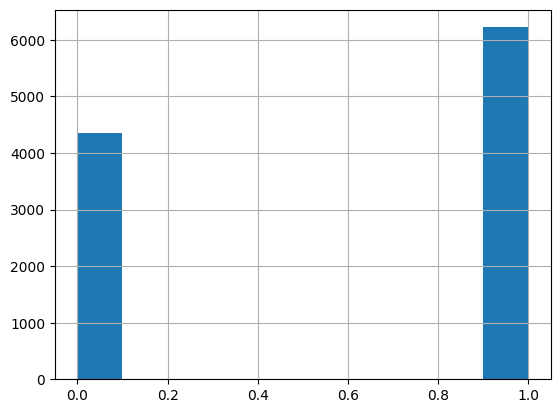

In [594]:
y_train.hist()

Our dataset has more positive data than negative data. Therefore, we have to apply under-sampling to majority data to get a balanced dataset.

In [595]:
train_df

,clean_text,text,label
5704,tired motivation one day happy next hate life ...,"Tired, have no motivation, one day I'm happy a...",1
9067,never whine never complain never try justify y...,"Never whine, never complain, never try to just...",0
2626,deep breathing remind irrationally panicking p...,"Deep breathing, reminding myself that I'm just...",1
9785,ontario canada badly need ubi since people ont...,Ontario and Canada badly needs UBI since peopl...,1
3035,hes type guy ask charity dad cast long shadow ...,He's the type of guy that doesn't ask for char...,0
...,...,...,...
5206,today realize truly dont deserve alive anymore...,After today I realized how I truly don’t deser...,1
15249,happy thursday sunflower shubhlondon goodmorni...,Happy Thursday sunflower . . . shubhlondon goo...,0
5405,lie depression get sick day every time say thr...,I shouldn't have to lie about my depression to...,1
860,did move mile away therapy just start again fi...,I did. I moved 1300 miles away. I’m in therapy...,0


<Axes: >

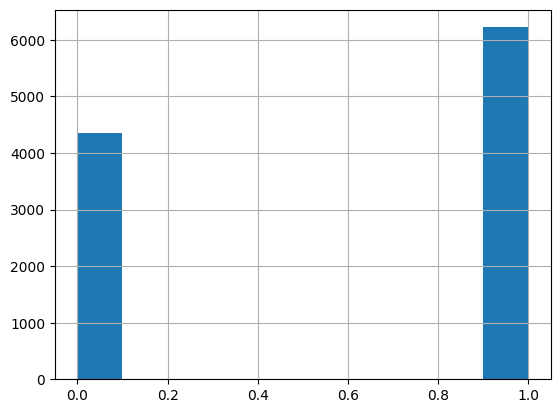

In [596]:
y_train.hist()

### Undersampling majority data

In [597]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = train_df[(train_df['label']==1)]
df_minority = train_df[(train_df['label']==0)]

minority_class_count = len(df_minority)

In [598]:
# Downsample the majority class (class 1) to match the minority class count
X_majority_downsampled, y_majority_downsampled = resample(
    df_majority[['clean_text', 'text']],  # Select only the majority class instances
    df_majority['label'],  # Corresponding labels
    replace=False,  # No replacement, as this is downsampling
    n_samples=minority_class_count,  #s The number of samples to match the minority class
    random_state=123  # For reproducibility
)

# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([X_majority_downsampled, y_majority_downsampled], axis=1)
train_df = pd.concat([train_df, df_minority], axis=0)
len(train_df)

8698

In [599]:
train_df['char_count'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
train_df['word_density'] = train_df['char_count'] / (train_df['word_count']+1)
train_df['punctuation_count'] = train_df['text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
train_df['title_word_count'] = train_df['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
train_df['upper_case_word_count'] = train_df['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [600]:
train_df

,clean_text,text,label,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
3724,get stress math tutor think loose braincells,I am getting stress from doing math tutor I th...,1,76,15,4.750000,0,3,3
4023,asian parent guilt trip pay rent need guidance...,Asian parents is guilt tripping me on paying t...,1,3522,681,5.164223,93,55,28
985,poor choices exacerbate situation vases game c...,Both of these were poor choices. It just exace...,1,304,53,5.629630,11,5,2
8588,join sept webinar develop mentalhealth strateg...,Join us Sept. 9 for our webinar on developing ...,1,195,33,5.735294,7,7,1
4930,anyone cry sight normal families start quite y...,Anyone cry at the sight of normal families? It...,1,440,85,5.116279,11,7,4
...,...,...,...,...,...,...,...,...,...
12398,birthday come november big birthday wish win l...,My birthday is coming up in November 1st My bi...,0,263,34,7.514286,2,3,0
16673,struggle anxiety actually good might professio...,I don't struggle with anxiety I'm actually ver...,0,266,47,5.541667,10,7,2
12291,leave end month excite,I’m leaving at the end of this month! excited,0,46,9,4.600000,1,0,0
15249,happy thursday sunflower shubhlondon goodmorni...,Happy Thursday sunflower . . . shubhlondon goo...,0,254,25,9.769231,3,2,0


## Word Visualization

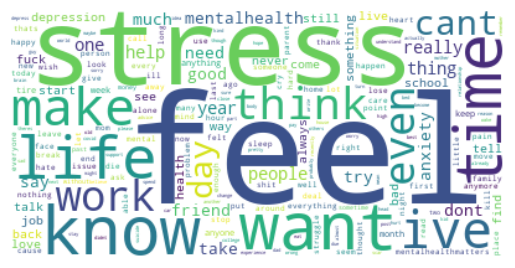

In [601]:
from wordcloud import WordCloud

combined_text = " ".join(train_df[train_df['label']==1]['clean_text'])

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(combined_text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()

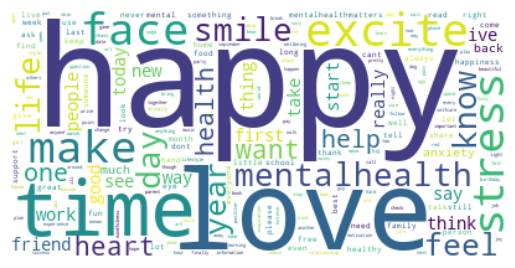

In [602]:
combined_text = " ".join(train_df[train_df['label']==0]['clean_text'])

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(combined_text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()

## Count Vectorizer

In [603]:
X_valid

,clean_text
1967,last week ive overcome serious issue travel ti...
5309,covid scare indian citizen keep tab world news...
740,anything wrong sexually want cease exist lot t...
6268,fuck sick year old shit arab country friend kn...
14890,mentalhealth important everyone matter demogra...
...,...
7518,siege misery part live tonight utc fundraise f...
13489,nearly time welcome back players first session...
14147,and red heart mentalhealthawareness mentalheal...
1745,taint memory dad doubt grandpa anyway control ...


In [604]:
from sklearn.feature_extraction.text import CountVectorizer

# create a count vectorizer object
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(train_df['clean_text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_df['clean_text'])
xvalid_count =  count_vect.transform(X_valid['clean_text'])

## Word Embedding with TF-IDF Vectorizer

In [605]:
train_df.head()

,clean_text,text,label,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
3724,get stress math tutor think loose braincells,I am getting stress from doing math tutor I th...,1,76,15,4.750000,0,3,3
4023,asian parent guilt trip pay rent need guidance...,Asian parents is guilt tripping me on paying t...,1,3522,681,5.164223,93,55,28
985,poor choices exacerbate situation vases game c...,Both of these were poor choices. It just exace...,1,304,53,5.629630,11,5,2
8588,join sept webinar develop mentalhealth strateg...,Join us Sept. 9 for our webinar on developing ...,1,195,33,5.735294,7,7,1
4930,anyone cry sight normal families start quite y...,Anyone cry at the sight of normal families? It...,1,440,85,5.116279,11,7,4


### N-gram = 1

In [606]:
vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer.fit(train_df['clean_text'])

xtrain_tfidf = vectorizer.transform(train_df['clean_text'])
xvalid_tfidf = vectorizer.transform(X_valid['clean_text'])

tfidf_tokens = vectorizer.get_feature_names_out()

df_tfidfvect = pd.DataFrame(data = xtrain_tfidf.toarray(),columns = tfidf_tokens)

MemoryError: Unable to allocate 1.51 GiB for an array with shape (8698, 23252) and data type float64

In [ ]:
tfidf_tokens

In [ ]:
df_tfidfvect.head()

### N-gram = 2

In [ ]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', stop_words= 'english', ngram_range=(2,3))

tfidf_vect_ngram.fit(train_df['clean_text'])
#
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train['clean_text'])
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_valid['clean_text'])

### count word

In [ ]:
train_df['char_count'] = train_df['clean_text'].apply(len)
train_df['word_count'] = train_df['clean_text'].apply(lambda x: len(x.split()))
train_df['word_density'] = train_df['char_count'] / (train_df['word_count']+1)
train_df['punctuation_count'] = train_df['clean_text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
train_df['title_word_count'] = train_df['clean_text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
train_df['upper_case_word_count'] = train_df['clean_text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [ ]:
train_df

In [ ]:

from sklearn.decomposition import LatentDirichletAllocation

# train a LDA Model
lda_model = LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_
vocab = count_vect.get_feature_names_out()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    accuracy = accuracy_score(predictions, y_valid)
    precision = precision_score(predictions, y_valid)
    recall = recall_score(predictions, y_valid)
    f1 = f1_score(predictions, y_valid)

    result = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

    return classifier, result

### Multinomial Naive Bayes

In [ ]:
print(train_df.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

In [ ]:
xvalid_count

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

classifier.fit(xtrain_count, y_train)

# predict the labels on validation dataset
predictions = classifier.predict(xvalid_count)

predictions

In [ ]:
# Naive Bayes on Count Vectors
model, result = train_model(MultinomialNB(), xtrain_count, y_train, xvalid_count)
print("NB, Count Vectors: ", result)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Naive Bayes on Count Vectors
model, result = train_model(LogisticRegression(), xtrain_count, y_train, xvalid_count)
print("LR, Count Vectors: ", result)


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Naive Bayes on Count Vectors
model, result = train_model(SVC(), xtrain_tfidf, y_train, xvalid_tfidf)
print("SVM, Count Vectors: ", result)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes on Count Vectors
model, result = train_model(RandomForestClassifier(), xtrain_count, y_train, xvalid_count)
print("RF, Count Vectors: ", result)


In [ ]:
def make_prediction(text):
    cleaned_text = clean_text(text)
    text_tfidf = vectorizer.transform([cleaned_text])

    predictions = model.predict(text_tfidf)

    return predictions

In [ ]:
make_prediction('Hi guys, I would like to say Im really happy so happy')